<a href="https://colab.research.google.com/github/roniel06/python_ml_exc/blob/main/Math_Practice_Puzzles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Puzzles Practice
## Author: Roniel Polanco


## Imports

In [ ]:
import random
import numpy as np
import math
import sympy as sp
from itertools import product 
from matplotlib import pyplot as plt
from sympy.plotting import plot



random.seed(31)

def binom(n,k):
  return math.factorial(n)/(math.factorial(n-k)*math.factorial(k))

# Exercise 1.6

Two pennies, one with $P(\mbox{head}) = u$ and one with $P(\mbox{head}) = w$, are to be tossed together independently. Define:

$$p_0 = P(\mbox{0 heads occur})$$
$$p_1 = P(\mbox{1 heads occur})$$
$$p_2 = P(\mbox{2 heads occur})$$

Can $u$ and $w$ be chosen such that $p_0 = p_1 = p_2$?

In [ ]:


u,w = 0.5, 0.5
C = np.array(['H', 'T'])

list(product(C, C))

[('H', 'H'), ('H', 'T'), ('T', 'H'), ('T', 'T')]

$$p_0 = (1-u)(1-w) = 1 - u - w + uw \\
p_1 = (1-w)u + (1-u)w = u + w - 2uw \\
p_2 = uw $$


---
Asuma que:
$$p_0 = p_1 = p_2 = p$$

Por lo tanto:
$$ p_0 + p_1 + p_2 = 3p = 1$$
$$ p = 1/3$$

Defina las siguientes ecuaciones a partir de las definiciones de probabilidades mas arriba:

$$ uw = \frac{1}{3}$$
$$ u + w - 2uw = 1/3 $$

Resuelva para $u$:

$$ u + \frac{1}{3u} - \frac{2}{3} = \frac{1}{3} $$

$$3u^2 +1 - 2u = u$$

debido a que $u$ es una probabilidad debe estar en el rango [0,1] mas sin embargo u no tiene solucion en dicho dominio para el sistema de ecuacion arriba. Por lo tanto $p_0 \neq p_1$.


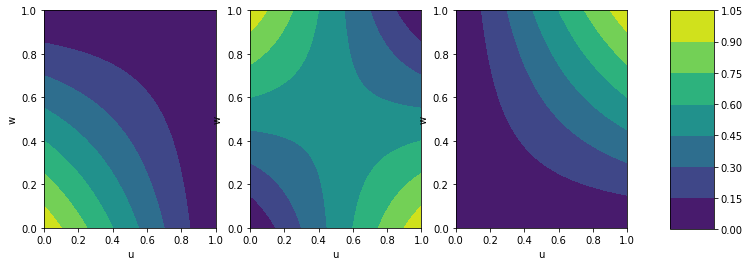

In [ ]:
fig = plt.figure(figsize=(12,4))

u = np.linspace(0, 1)
w = np.linspace(0, 1)
U, W = np.meshgrid(u, w)

P_0 = lambda u,w: (1-u)*(1-w)
P_1 = lambda u,w: u*(1-w) + (1-u)*w 
P_2 = lambda u,w: u*w


for i, P in enumerate([P_0, P_1, P_2]):
  plt.subplot(131 + i)
  countour = plt.contourf(U, W, P(U,W));
  plt.xlabel('u')
  plt.ylabel('w')


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.76])
fig.colorbar(countour, cax=cbar_ax) 

Observe que $u$ y $w$ son distintos en cada grafico para $p_0 = 0.3$, $p_1 = 0.3$, y $p_2 = 0.3$ 

# Exercise 1.16
How many differenmt sets of initials can be formed if every person has suername and 

a. exactly two give names?
Esto es \|$A \times A$\|

b. either one or two given names? Esto es $|A \times A| + |A \times A \times A|$ = 26^2 + 26^3

c. either one or two or three given names? Esto es $ |A| + |A \times A| + |A \times A \times A|$ = 26 + 26^2 + 26^3

In [ ]:
A = list('abcdefghijklmnopqrstuvwxyz') 

a = list(product(A, A, A))
print(a[:10])
print(len(a))
print(len(a) == 26**3)

[('a', 'a', 'a'), ('a', 'a', 'b'), ('a', 'a', 'c'), ('a', 'a', 'd'), ('a', 'a', 'e'), ('a', 'a', 'f'), ('a', 'a', 'g'), ('a', 'a', 'h'), ('a', 'a', 'i'), ('a', 'a', 'j')]
17576
True


In [ ]:
a = list(product(A, A, A))
b = list(product(A, A,))
print(a[:10])
print(b[:10])
print(len(a) + len(b))
print(len(a) + len(b) == 26**2 + 26**3)

[('a', 'a', 'a'), ('a', 'a', 'b'), ('a', 'a', 'c'), ('a', 'a', 'd'), ('a', 'a', 'e'), ('a', 'a', 'f'), ('a', 'a', 'g'), ('a', 'a', 'h'), ('a', 'a', 'i'), ('a', 'a', 'j')]
[('a', 'a'), ('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('a', 'f'), ('a', 'g'), ('a', 'h'), ('a', 'i'), ('a', 'j')]
18252
True


# Exercise 1.17
In the game of dominoes, each piece is marked with two numbers. The pieces are symmetrical so that the number is not ordered (so, for example (2,6) = (6,2)).

How many differente pieces can be formed using the numbers 1,2,...,n?


In [ ]:
N = 6 # use any number here

In [ ]:
# brute force approach
pieces = []
for i in range(1,N+1):
  for j in range(i, N+1):
    pieces.append((i,j))

print(pieces)
len(pieces)


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 3), (3, 4), (3, 5), (3, 6), (4, 4), (4, 5), (4, 6), (5, 5), (5, 6), (6, 6)]


21

Esto es n (piezas con lados iguales) mas la cantidad total de piezas obtenidadas al tomar 2 numeros de un total de n:

$$ N + \binom{n}{2} = \frac{n!}{(n-2)!2!} = \frac{n(n-1)}{2}$$

In [ ]:
print("Cantidad total de piezas que pueden ser formadas: ",N + N*(N-1)/2)

Cantidad total de piezas que pueden ser formadas:  21.0


# Exercise 1.21
A closet contains $n$ pairs of shoes. If $2r$ shoes are chosen at random ($2r \lt n$) what is the probability that there will be no matching pair in the sample?
  




























  

In [ ]:
n,r = 5,2
#Distribucion Binomial

def binom(n,k):
  return math.factorial(n)/(math.factorial(n-k)*math.factorial(k))

#Calculo de la probabilidad
def p(n, r):
  return binom(n, 2*r) * 2**(2*r) / binom(2*n, 2*r)

p = p(n,r)
print("La probabilidad de que no hayan pares iguales es:",p)

La probabilidad de que no hayan pares iguales es: 0.38095238095238093


In [ ]:
#En este proceso se puede presentar que mientas mas iteraciones se den, mas se
# Mas pequeños son los valores en Y

import collections

I = lambda S: 0 if any(2*i in S and (2*i+1) in S for i in range(n)) else 1

line = []
lo, hi = 10, 1000
for i in range(lo, hi):
  rv = []
  for j in range(i):
    s = np.random.choice(2*n,2*r,replace=False)
    rv.append(I(s))
  rv = np.array(rv)
  line.append(rv[rv==1].shape[0] / i)

print(line[-1])

0.39039039039039036


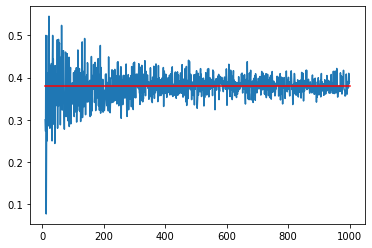

In [ ]:
plt.plot(np.arange(lo, hi), line)
plt.plot([lo, hi],[p,p], color='red')


# Exercise 1.22

a. In a draft lottery containing the 366 days of the year (including February 29) what is the probability that first 180 days draw (without replacement) are evenly distribuited among the 12 months.

A: Seleccionar 180 dias tal que cada cada mes tenga la misma cantidad de dias.
S: Seleccinoar 180 dias de 366.

Tienes $\binom{31}{15}$ formas de seleccionar 15 dias de cada uno de los 7 meses de 31 dias, $\binom{30}{15}$  formas de seleccionar 15 dias de cada uno de los 4 meses de 30 dias y finalmente $\binom{29}{15}$ forma de seleccionar 15 dias del mes de febrero. Esto es:

$$ |A| = \binom{31}{15}^7 + \binom{30}{15}^4 + \binom{29}{15} $$

Ademas el espacio muestral es $|S| = \binom{366}{180}$. Asi que la probabilidad seria:

$$ P(A) = \frac{|A|}{|S|} = \frac{\binom{31}{15}^7 + \binom{30}{15}^4 + \binom{29}{15}}{\binom{366}{180}} $$

In [ ]:
A_card = binom(31,15)**7 * binom(30, 15)**4 * binom(29,15)
S_card = binom(366, 180)

P = A_card / S_card
P

1.6672947199721384e-09

b. What is the probability that the first 30 days drawn contain none from September?

B = Primeros 30 dias seleccionado ninguno pertenece al mes de septiembre.

S = Seleccionar 30 dias de 366

$$ 
|B| = \binom{366-30}{30} \\
|S| = \binom{366}{30} \\
P(B) = \frac{|B|}{|S|} = \frac{\binom{335}{30}}{\binom{366}{30}}
$$

In [ ]:
B_card = binom(366-30,30)
S2_card = binom(366, 30)

P_2 = B_card / S2_card
P_2

0.06869054127127916

# Exercise 1.46

Seven balls are distribuited randomly into seven cells. Let $X_i = $ the number of cells containing exactly i balls. What is the probability of $X_3$? (That is, find $P(X_3 = x)$ for every possible $x$.)



# Exercise 1.47 
Prove that the following functions are cdfs.

a. $ \frac{1}{2} + \frac{1}{\pi}\tan^{-1}(x)$, $x \in (-\infty, \infty)$


In [ ]:
x = sp.var('x') #Declarar variable simbolica x

Fx = 0.5 + (1/sp.pi) * sp.atan(x) #Aplicar la Formula
Fx_ninf = Fx.subs({x: -sp.oo}) #Sustituir en x -infinito
Fx_ninf


0

*Derivada*


In [ ]:
Fx_inf = Fx.subs({x: sp.oo}) # Sustituir en x infinito
print("F(oo)= ",round(Fx_inf))

fx = Fx.diff()
print("\n")
print("Derivada respecto a X en los limites -oo a oo \n")

fx

F(oo)=  1


Derivada respecto a X en los limites -oo a oo 



1/(pi*(x**2 + 1))

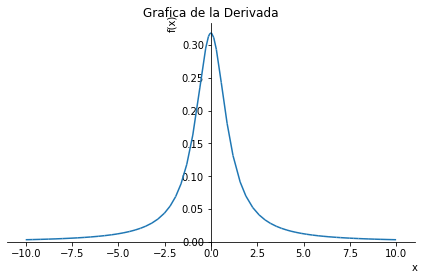

In [ ]:
plot(fx,title="Grafica de la Derivada") #Grafica de la derivada


**b.** $ (1-e^{-x})^{-1}$, $ x \in (0,\infty)$



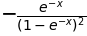

In [ ]:
x = sp.var('x')

Fx =(1 - sp.E **-x) **-1
Fx


Fx.subs({x: -sp.oo,x:sp.oo})
Fx.diff()



-exp(-x)/(1 - exp(-x))**2

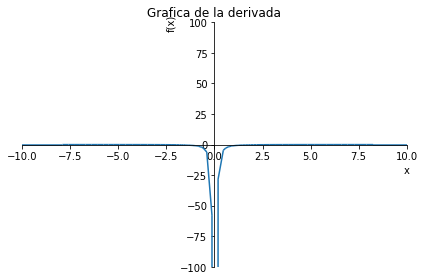

In [ ]:
plot(dy_dx,title='Grafica de la derivada', ylim=[-100,100], xlim=[-10,10], color='red')

In [ ]:
sp.init_printing(use_latex = True)

x = sp.symbols('x')

print('Satisface', {sp.limit(1 / (1 + sp.exp(-x)), x, -sp.oo), sp.limit(1 / (1 + sp.exp(-x)), x, sp.oo)})


Satisface {0, 1}


c. $ e^{-e^{-x}} $ , $ x \in (-\infty , \infty)$ 

exp(-exp(-x))
exp(-x)*exp(-exp(-x))


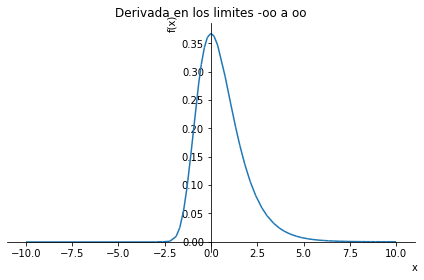

In [ ]:
x= sp.var('x')

Fx= sp.E **(-sp.E **-x)

Fx.subs({x: -sp.oo, x: sp.oo})
diff = Fx.diff()
print(Fx)
print(diff)
plot(diff,title='Derivada en los limites -oo a oo')

In [ ]:
x= sp.var('x')

Fx= (1 / (sp.E **(1/(-sp.E **x))))

Fx.subs({x: sp.oo})
diff = Fx.diff()
print(Fx)
print(diff)
plot(diff,title='Derivada en los limites -oo a oo')

exp(exp(-x))
-exp(-x)*exp(exp(-x))
